# Image Classifier
a fully connected network would not be appropriate for image recognition due to the lack of translation invariance, as well as the inconvenience of having to train a network with so many weights.
### Setup and Load data

In [60]:
!pip install tensorflow
!pip install opencv-python

In [61]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
anyio                        3.5.0
appdirs                      1.4.4
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        22.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       4.1.0
Bottleneck                   1.3.5
brotlipy                     0.7.0
cachetools                   5.3.1
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           2.0.4
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.5
cryptography                 39.0.1
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.7.1
en

In [62]:
import tensorflow as tf
import os #navegate through documents

In [63]:
#This code snippet is used to avoid Out-Of-Memory (OOM) errors when working with TensorFlow and GPUs. OOM errors occur when the GPU memory is insufficient to handle the computational tasks, leading to crashes or failures during the execution of the program.
gpus = tf.config.experimental.list_physical_devices('GPU') #retrieves a list of available physical GPUs
for gpu in gpus: #Limiting memory growth
    tf.config.experimental.set_memory_growth(gpu, True) #allows the GPU memory allocation to grow dynamically as needed, rather than allocating all the memory upfront.

In [64]:
import cv2 
import imghdr

In [65]:
data_dir = '../Data_sets/ImageClassifier'
img_extensions = ['jpeg', 'jpg', 'bmp', 'png']

In [66]:
os.listdir(data_dir) #Go to files
os.listdir(os.path.join(data_dir, 'happy')) #Access to each image
len(os.listdir(os.path.join(data_dir, 'happy')))

102

### Remove dodgy images

In [67]:
for img_type in os.listdir(data_dir):#Go to files
    for image in os.listdir(os.path.join(data_dir, img_type)): #Access to each image
        path = os.path.join(data_dir, img_type, image) #Return path for 'image'
        try: #Read image
            img = cv2.imread(path)
            tip = imghdr.what(path) #extract format of image in path
            if tip not in img_extensions:
                print('Image have different extension {}'.forma(path))
                os.rmove(path) #Delete it
        except Exception as e:
            print('Issue with image {}'.format(path))

In [68]:
tf.data.Dataset #represents a sequence of elements, where each element can be a single data point or a batch of data points. It is a powerful tool for building efficient and scalable input pipelines (a pipeline refers to a sequence of operations applied to a dataset to prepare and preprocess the data for training or inference) for machine learning models.

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [69]:
import numpy as np
from matplotlib import pyplot as plt

In [70]:
data = tf.keras.utils.image_dataset_from_directory('../Data_sets/ImageClassifier') #create a TensorFlow dataset from a directory of image files
#Resize iages, shuffle, etc

Found 171 files belonging to 2 classes.


In [71]:
#iterator as numpy array
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [72]:
batch[1] #Happy or sad classification

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

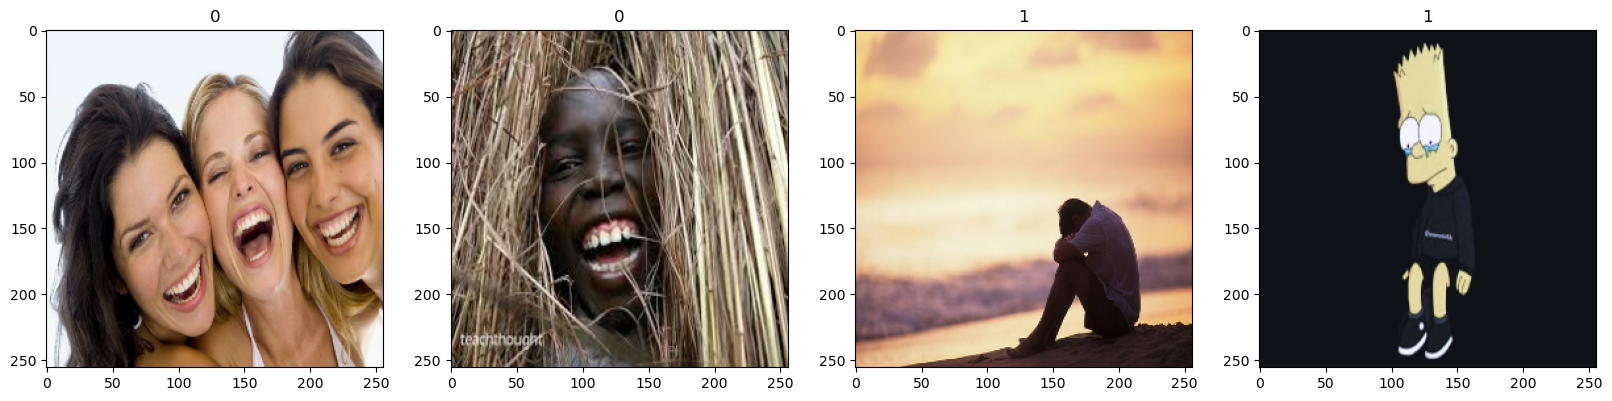

In [73]:
#To know the label, let's to plot
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Happy 0, sad 1 

### Preprocess
#### Scale data

In [74]:
#Data values between 0 and 1
data = data.map(lambda x, y: (x/255, y)) # x images, y target variable

In [75]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

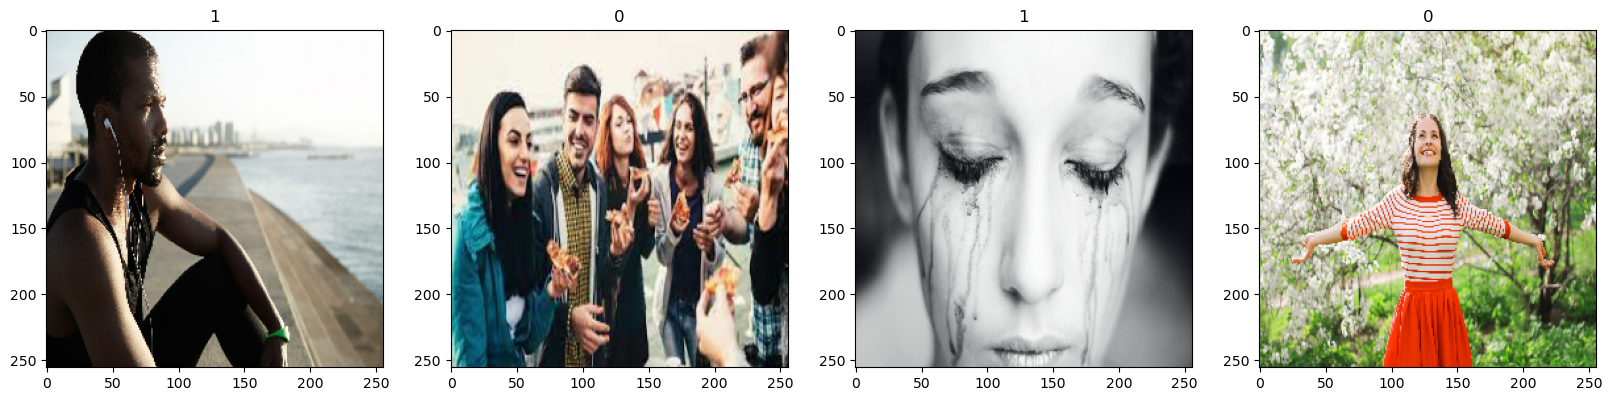

In [76]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### Split data

In [77]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.4)
test_size = int(len(data)*0.2)

In [78]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Deep model

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [87]:
model = Sequential() # linear stack of layers

In [88]:
#model.add(Conv2D(# of filters, (siz of the filter in pixels), numer of pixel to tralate (dx), activation='relu', input_shape(image_size)))
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3) ) )
model.add(MaxPooling2D()) # It reduces the spatial dimensions (width and height) of the input data, thus reducing the number of parameters and computational complexity in subsequent layers.
#reduce the spatial dimensions of the data, helping to extract and retain important features while improving computational efficiency.

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #transform multidimensional input data into a one-dimensional vector, to prepare the data for fully connected layers 
#Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #sigmoid because we eant 0 or 1

In [89]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy']) #prepares the model for training

In [90]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 16)       


### Train

In [91]:
logdir = 'logs' # directory where the logs for TensorBoard will be saved.

In [92]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # creates a TensorBoard used to enable the integration of TensorBoard with the training process

In [93]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) # starts the training process

Epoch 1/20
3/3 [==============================] - 12s 2s/step - loss: 0.8511 - accuracy: 0.5521 - val_loss: 0.6741 - val_accuracy: 0.6719
Epoch 2/20
3/3 [==============================] - 8s 3s/step - loss: 0.6569 - accuracy: 0.6875 - val_loss: 0.6247 - val_accuracy: 0.6250
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: 0.6141 - accuracy: 0.6146 - val_loss: 0.5790 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: 0.5514 - accuracy: 0.6562 - val_loss: 0.5492 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 9s 3s/step - loss: 0.5644 - accuracy: 0.7708 - val_loss: 0.4531 - val_accuracy: 0.8281
Epoch 6/20
3/3 [==============================] - 7s 2s/step - loss: 0.4440 - accuracy: 0.8229 - val_loss: 0.3858 - val_accuracy: 0.8906
Epoch 7/20
3/3 [==============================] - 7s 2s/step - loss: 0.4382 - accuracy: 0.8021 - val_loss: 0.4389 - val_accuracy: 0.7656
Epoch 8/20
3/3 [========================

### Performance

In [109]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


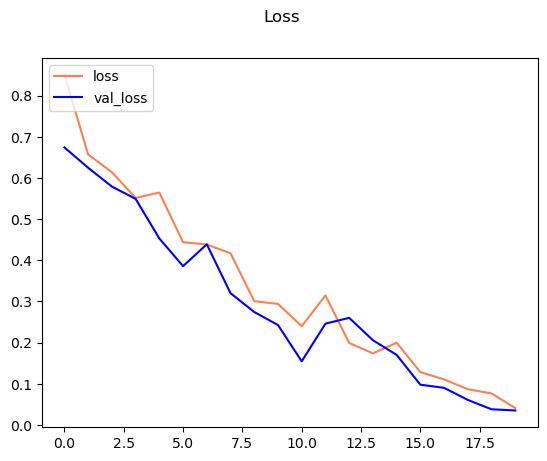

In [98]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='coral', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=12)
plt.legend(loc="upper left")
plt.show()

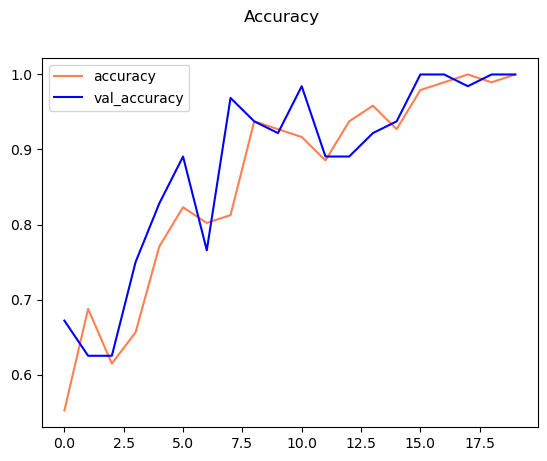

In [97]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='coral', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=12)
plt.legend(loc="upper left")
plt.show()

In [111]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [112]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 521ms/step


In [115]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


### Test

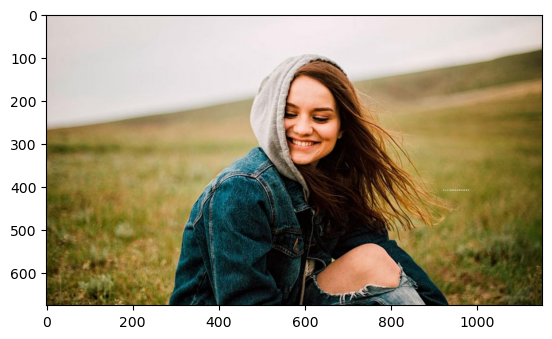

In [121]:
img = cv2.imread('../Data_sets\ImageClassifier\Test\happy1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #Fixing color
plt.show()

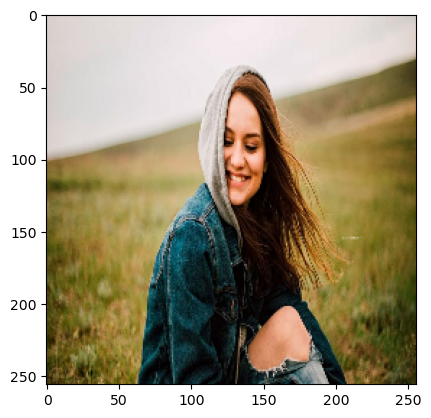

In [130]:
resize = tf.image.resize(img, (256, 256))
resized_np = resize.numpy().astype(np.uint8)  # Convert to uint8 instead of int
resized_rgb = cv2.cvtColor(resized_np, cv2.COLOR_BGR2RGB)
plt.imshow(resized_rgb)
plt.show()

In [131]:
np.expand_dims(resize, 0) #Increase dimentation due to predict argument

array([[[[203.      , 205.      , 215.      ],
         [205.      , 207.      , 217.      ],
         [206.      , 208.      , 218.      ],
         ...,
         [197.95459 , 201.95459 , 206.95459 ],
         [199.      , 203.      , 208.      ],
         [197.      , 201.      , 206.      ]],

        [[203.      , 205.      , 215.      ],
         [205.      , 207.      , 217.      ],
         [206.      , 208.      , 218.      ],
         ...,
         [198.86377 , 202.86377 , 207.86377 ],
         [199.      , 203.      , 208.      ],
         [197.      , 201.      , 206.      ]],

        [[203.      , 205.      , 215.      ],
         [205.      , 207.      , 217.      ],
         [206.      , 208.      , 218.      ],
         ...,
         [199.75    , 203.75    , 208.75    ],
         [199.      , 203.      , 208.      ],
         [197.      , 201.      , 206.      ]],

        ...,

        [[ 23.696777,  49.90088 ,  71.67383 ],
         [ 19.196777,  65.53613 ,  71.78613 ]

In [132]:
#Prediction
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 176ms/step


In [135]:
if yhat < 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# make for to proof all the image test

In [141]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))

In [143]:
new_model = load_model('./models/imageclassifier.h5')
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

if yhatnew < 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 [==============================] - 0s 193ms/step
Predicted class is Happy
